<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_06_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mathematical optimization

#Examples of minimization problems

* statistics (parameter estimation to minimize some loss function);
* regression (find parameters of the line to minimize sum of errors);
* neural networks (find weights to minimize loss function);

* industry management (how to spend money and resources to maximize profit);
* insurance (find insurance coefficients to minimize risk of the loss);
* gambling (minimize losses of casino);
* physics (find trajectory to minimize action).

In [ ]:
#@title #Optimization problems

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`
<b>General global optimization</b>
<ul>
  <li> <b>Goals:</b> Find a global minimum.
  <li> <b>Functional class:</b> Continuous functions.
  <li> <b>Oracle:</b> 0-1-2 order black box.
  <li> <b>Desired properties:</b> Convergence to a global minimum.
  <li> <b>Features:</b> Prom theoretical point of view, this game is too short. We always lose it. Interesting in context of NNs.
</ul>
`,
`
<b>Nonlinear optimization</b>
<ul>
  <li> <b>Goals:</b> Find a local minimum.
  <li> <b>Functional class:</b> Differentiable functions.
  <li> <b>Oracle:</b> 1-2 order black box.
  <li> <b>Desired properties:</b> Convergence to a local minimum. Fast convergence.
  <li> <b>Features:</b> Variability of approaches.Widespread software. The goal is not always acceptable and reachable.
</ul>
`,
`
<b>Convex optimization</b>
<ul>
  <li> <b>Goals:</b> Find a global minimum.
  <li> <b>Functional class:</b> Convex sets and functions.
  <li> <b>Oracle:</b> 1-order black box.
  <li> <b>Desired properties:</b> Convergence to a global minimum.
  <li> <b>Features:</b> Very rich and interesting theory. Comprehensive complexity theory. Efficient practical methods. The problem class is sometimes restrictive.
</ul>
`,
`
<b>Interior-point polynomial-time methods</b>
<ul>
  <li> <b>Goals:</b> Find a global minimum.
  <li> <b>Functional class:</b> Convex sets and functions with explicit structure.
  <li> <b>Oracle:</b> 2nd-order non-local oracle.
  <li> <b>Desired properties:</b> Fast convergence to a global minimum.
  <li> <b>Features:</b> Very new and perspective theory. Avoids the black box concept. Rate of convergence depends on the structure of the problem.The problem class is practically the same as in convex optimization.
</ul>
`
  ]
)
</script>

#Calculus preliminaries

Suppose

$$
f: X \rightarrow \mathbb{R},
$$

where $X \subset \mathbb{R}^n$.

Taylor expansion

$$
f(\boldsymbol {x}+ \boldsymbol {h})=f(\boldsymbol {x})+\nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{1}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}+o(||{\boldsymbol {h}||}^3).
$$

$\nabla f(\boldsymbol {x})$ is the gradient of the function

$$
\nabla_i f(\boldsymbol {x})=\frac{\partial f}{\partial x_i}.
$$

The gradient of $f$ at a point is a vector pointing in the direction of the steepest slope or grade at that point. The steepness of the slope at that point is given by the magnitude of the gradient vector.
$\boldsymbol {H}_{ij}$ is the Hessian (Матриця Гессе) - a square matrix of second-order partial derivatives

$$
\boldsymbol {H}_{ij} f(\boldsymbol {x})=\frac{\partial^2 f}{\partial x_i \partial x_j}.
$$

$\boldsymbol {H}_{ij}$ is symmetric.

In real application it may be too difficult to calculate Hessian analytically and it's calculated using approximation

$$
\boldsymbol {H}(\boldsymbol {x})\boldsymbol {h}\approx \frac{1}{r}\left(\nabla f(\boldsymbol {x}+r\boldsymbol {h})-\nabla f(\boldsymbol {x})\right).
$$

If function has extremum at point $\boldsymbol {x}_0$

$$
\nabla f(\boldsymbol {x}_0)=0.
$$

Convex functions

$$
\forall  \boldsymbol {x}_1,\boldsymbol {x}_2 \in X, \quad \forall t\in [0,1] :\quad f\underbrace{\left(t\boldsymbol {x}_1+(1-t)\boldsymbol {x}_2\right)}_{x}\leq \underbrace{tf(\boldsymbol {x}_1)+(1-t)f(\boldsymbol {x}_2)}_{l(x)} .
$$


In [ ]:
#@title ##Concave/convex functions (опукла/увігнута)

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
  `
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/concave_convex_neither_function.svg' width=800>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/concave_function.svg' width=800>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/convex_function.svg' width=800>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/neither_function.svg' width=800>
  </img>
 `
  ]
)
</script>

Any local minimum of a convex function is also a global minimum. A strictly convex function will have at most one global minimum.

Convex (Опукла множина) set or a convex region is a subset of a Euclidean space, or more generally an affine space over the reals, that intersects every line into a line segment (possibly empty).



In [ ]:
#@title Convex/nonconvex sets
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/convex_nonconvex_sets.svg'>
</img>

Convex optimization is a subfield of mathematical optimization that studies the problem of minimizing convex functions over convex sets. **Convex problems are the ones we know how to solve efficiently.**

In real application we have to deal with nonconvex functions as well. In the last decades methods were developed (SGD) that work well with non-convex problems as well.

In [ ]:
#@title Epigraph and hypograph
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/epigraph_and_hypograph.svg'>
</img>

**Small properties list of convex sets:**
* Level set $Q = \{\mathbf{x} \in \mathbb{R}^n | f(\mathbf{x}) \leq 0\}$ of a convex function $f(\mathbf{x})$ is convex ($0 \geq f(\mathbf{x}), 0 \geq f(\mathbf{y}) \Rightarrow 0 \geq \theta f(\mathbf{x}) + (1 - \theta) f(\mathbf{y}) \geq f(\theta \mathbf{x} + (1 - \theta)\mathbf{y}) \Rightarrow \theta \mathbf{x} + (1 - \theta)\mathbf{y} \in Q$ )
* For $Q_1$ and $Q_2$ being convex, $Q_1 \cap Q_2$ is convex as well.
* For $Q_1$ and $Q_2$ being convex, $Q_1 + Q_2 = \{\mathbf{x} + \mathbf{y} | \mathbf{x} \in Q_1, \mathbf{y} \in Q_2\}$ is convex as well.
* For $Q_1$ and $Q_2$ being convex, $Q_1 \times Q_2$ is convex as well.
* For $Q$ being convex, its *conic hull* $K(Q) = \{\beta \mathbf{x} | \mathbf{x} \in Q, \beta \geq 0\}$ is convex.
* For $Q_1$ and $Q_2$ being convex, their *convex hull* $Conv(Q_1;Q_2) = \{\alpha \mathbf{x} + (1 - \alpha) \mathbf{y} | \mathbf{x} \in Q_1, \mathbf{y} \in Q_2, 1 \geq \alpha \geq 0\}$ is (unexpectedly) convex.
* For $Q$ being convex, its affine transformation and inverse affine transformation are convex.

#Standard form of convex optimization problem

* In general, optimization problems are unsolvable.
* It is often the case to choose between a precise model that cannot be certainly solved in a reasonable amount of time and rough model that can be.
* We know certain classes of models that are sovable (e.g. linear models, convex models).
* Convex problems are the ones we know how to solve efficiently.

Optimization of the function may be subjected to additional constraints or not.
Optimization could be:
*   Constrained
*   Unconstrained

Standard form of convex optimization problem with constraint reads as

$$
\begin{aligned}
& \text{minimize}_\boldsymbol{x} \, f(\boldsymbol{x}) \\
& \text{subject to } \qquad
\begin{aligned}
& f_i(\boldsymbol{x}) \leq 0 \qquad i=1\cdots m \\
& h_j(\boldsymbol{x}) = 0 \qquad j=1\cdots p \\
\end{aligned}
\end{aligned}
$$

Convex optimization is a subfield of mathematical optimization that studies the problem of minimizing **convex functions over convex sets**.

where $\boldsymbol{x} \in \mathbb{R}^n$ is the optimization variable, the functions $f,f_1, \cdots,f_m$ are **convex** and the functions $h_1, \cdots, h_p$ are **affine**.
In this notation, the function $f$ is the objective function of the problem, and the functions $g_{i}$ and $h_{i}$ are referred to as the constraint functions.

The function f is called, variously, an **objective function**, a **loss function** or **cost (regret) function** (in economy) or an **energy function** or **energy functional** (in physics).
If we want to find maximum of a function it's usually cold a **utility function** or **fitness function**.

The set of points satisfying the constraints is called the **feasible set** (допустима множина).
If $\boldsymbol{x}$ is feasible and $f_i(\boldsymbol{x})=0$ then we say the inequality constraint $f_i(\boldsymbol{x})\leq 0$ is **active** at $\boldsymbol{x}$.
The **optimal value** $p^*$ of the problem is defined as

$$
p^*=\inf \, \{f(\boldsymbol{x})\,|\,\boldsymbol{x} \text{ satisfies all constraints}\}
$$

$x^*$ is an **optimal point** if $\boldsymbol{x}^*$ is feasible and $f(\boldsymbol{x}^*)=p^*$.



Sometimes the problem is written as
$$
\begin{aligned}
& \text{minimize}_\boldsymbol{x} \, f(\boldsymbol{x}) \\
& \text{subject to } \qquad
\begin{aligned}
& f_i(\boldsymbol{x}) \leq 0 \qquad i=1\cdots m \\
& A\boldsymbol{x} = \mathbf{b} \\
\end{aligned}
\end{aligned}
$$
to underline that **equality constraints are affine**.

**Why are equality constraints affine?**


For problem to be convex we shoud have two properties:
* objective function should be convex
* feasible set should be convex

Now feasible set is the problem.
Everything is ok with inequality constraints, because their level sets are convex (see proof earlier).
Their intersection is convex as well.
But equality constraints (even if all $h_i$ are convex) may not define a convex set (note that circle without its interior is not convex).
For an equality constraint $h(\mathbf{x}) = 0$ to define a convex set it should be $h(\mathbf{x}) = 0 \wedge h(\mathbf{y}) = 0 \rightarrow h(\theta\mathbf{x} + (1 - \theta)\mathbf{y}) = 0$, thus $h(\theta\mathbf{x} + (1 - \theta)\mathbf{y}) = \theta h(\mathbf{x}) + (1 - \theta)h(\mathbf{y})$ that is an alternative definition of affine mapping.
Thus $h$ is affine on its own feasibility set.
Now it can be affine everywhere that justifies the problem statement, or be replaced with inequality constraint involving convex function.

Now the answer is:
* We want feasible set to be convex.
* We want every constraint to define a convex set so that their intersection (feasible set) will be convex.
* Equality constrains define a convex set only if they are affine on this set.
* Convex $h$ may not lead to convex set ($x^2 + y^2 = 1$ -- circle without interior, not convex).

**Why do we love convex problems?**

Classic ML problems (linear regression, SVM, etc) can be often described as **convex problems**.
The following are useful properties of convex optimization problems:
* every local minimum is a global minimum;
* the feasible set is convex;
* if the objective function is strictly convex, then the problem has at most one optimal point.


A hierarchy of convex optimization problems. (LP: linear program, QP: quadratic program, SOCP second-order cone program, SDP: semidefinite program, CP: cone program, GFP: graph form program.)

In [ ]:
#@title #A hierarchy of convex optimization problems

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
  `
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/all_optimization_problems.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/linear_programming.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/quadratic_programming.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/second_order_cone_programming.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/semidefinite_programming.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/cone_programming.svg'>
  </img>
`
  ]
)
</script>

**Note A:** inclusion QP$\subset$SOCP is non-trivial and may seem counter-intuitive, see [this lecture on YouTube](https://www.youtube.com/watch?v=sVbcJx4g-LQ) for more details.

**Note B:** [Wikipedia](https://en.wikipedia.org/wiki/Semidefinite_programming) uses equivalent formulation of SDP through matrix of scalar products
$$
\begin{aligned}
& \text{minimize}_{\mathbf{x}^1, \ldots, \mathbf{x}^n \in \mathbb{R}^n} \, \displaystyle \sum_{i,j \in [n]} c_{i,j} (\mathbf{x}^i \cdot \mathbf{x}^j) \\
& \text{subject to } \qquad
\begin{aligned}
& {\displaystyle \sum_{i,j \in [n]} a_{i,j,k} (\mathbf{x}^i \cdot \mathbf{x}^j) \leq b_k} \text{  for all }k \\
\end{aligned}
\end{aligned}
$$

**Example 1:** unconstrained problem
$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
\end{aligned}
$$
obviously $x^* = 0$ and $p^* = 1$.

**Example 2:** inactive constraint
$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
& \text{subject to } \qquad
\begin{aligned}
& x^2 - 1 \leq 0
\end{aligned}
\end{aligned}
$$
obviously $x^* = 0$ and $p^* = 1$.

**Example 3:** active constraint
$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
& \text{subject to } \qquad
\begin{aligned}
& (x - 2)^2 - 1 \leq 0
\end{aligned}
\end{aligned}
$$
obviously $x^* = 1$ and $p^* = 2$.


#KKT Conditions

Many problems can be classified as **convex**. They have nice properties that allow us efficiently solve them.


Consider a minimization problem wih one constraint
$$
\begin{aligned}
 \text{minimize}_\boldsymbol{x} \, & f(\boldsymbol{x}) \\
\text{subject to }
& f_1(\boldsymbol{x}) \leq 0\\
\end{aligned}
$$
and think about it as a particle seeking for the minimum of the potential field $f$, while being enclosed in a shell $f_1(\boldsymbol{x}) = 0$. See demo below for intuition.

In [ ]:
#@title Constraints from physics
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_constraints_from_physics.html"
        width="800" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

You can see that particle stops moving when $\nabla f$ and $\nabla f_1$ are coliner and have opposite directions (active constraint) of $\nabla f = 0$ (inactive constraint, particle finds global minimum). This means that at the desired minimum $\boldsymbol{x}$ gradients are proportional $\nabla f \propto \nabla f_1$ and there exists such positive scaling factor $\lambda \geq 0$ that
$$
\nabla f(\boldsymbol{x}) = - \lambda \nabla f_1(\boldsymbol{x}).
$$
For inactive constraints $\lambda = 0$, thus $\nabla f = 0$. In an obvious way we can generalize this to many constraints and state that there exist such **positive** $\lambda_i$ that
$$
\nabla f(\boldsymbol{x}) + \sum_i{\lambda_i \nabla f_i(\boldsymbol{x})} = 0, \quad \lambda_i \geq 0.
$$
You can imagine similar situation for equality constraints $h_i(\boldsymbol{x}) = 0$, but in this case there is no such thing as "inactive" constraint -- particle never leaves $h_i(\boldsymbol{x}) = 0$, thus proportionality coefficient can be negative
$$
\nabla f(\boldsymbol{x}) + \sum_i{\lambda_i \nabla f_i(\boldsymbol{x})} + \sum_i{\mu_i \nabla h_i(\boldsymbol{x})} = 0, \quad \lambda_i \geq 0 \quad \mu_i - unrestricted.
$$
In case of non-differentiable functions gradient can be generalized to [sub-gradient](https://en.wikipedia.org/wiki/Subderivative)(subderivative), i.e.


In [ ]:
#@title ##Support lines
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/subderivatives.svg'>
</img>

$$
\partial f(\boldsymbol{x}) + \sum_i{\lambda_i \partial f_i(\boldsymbol{x})} + \sum_i{\mu_i \partial h_i(\boldsymbol{x})} \ni 0, \quad \lambda_i \geq 0 \quad \mu_i - unrestricted.
$$
The last equality together with demand for the point $x$ to be feasible constitute **Karush–Kuhn–Tucker conditions**
* **Stationarity (стаціонарності):** $
\partial f(\boldsymbol{x}) + \sum_i{\lambda_i \partial f_i(\boldsymbol{x})} + \sum_i{\mu_i \partial h_i(\boldsymbol{x})} \ni 0, \quad \lambda_i \geq 0 \quad \mu_i - unrestricted.
$
* **Primal feasibility:** $f_i(\boldsymbol{x}) \leq 0$ and $h_i(\boldsymbol{x}) = 0$
* **Dual feasibility (невід'ємності):** $\lambda_i \geq 0$
* **Complementary slackness (доповнюючої нежорсткості):** $\lambda_i f_i(\boldsymbol{x}) = 0$

Under appropriate **constraint qualifications (умови регулярності)** the KKT conditions are **necessary** for point $\boldsymbol{x}$ to be optimum, but they are **not sufficient**.

If we want to be sure that solving for KKT is meaningful, i.e. optimal point exists and satisfies KKT, additional statements should be implied.
The last peace of the jigsaw are **Regularity conditions (or constraint qualifications)**.
Despite their complicated name, they only mean that the problem is not too ill-formed, i.e. we don't demand $x < 3$ and $x > 5$ at the same time or something like that.


There are many types of regularity conditions and they may apply together with KKT not only to convex problems.
But at the moment we are interested in convex problems only.
A well-known **Slater's condition** for convex problems reads:
* we presume that the set of all such $\boldsymbol{x}$ that all $f_i(\boldsymbol{x}) < 0$ (strict inequality!) has non-empty interior, i.e. our particle has some space to move around

**If constraint qualifications hold, we can be sure that the solution exists and satisfies KKT.**


**Note for utterly confused**
* if $\boldsymbol{x}$ is the solution we search for **and** strong duality holds (see next section) $\Rightarrow$ KKT holds at $\boldsymbol{x}$
* Constraint qualification hold $\Rightarrow$ KKT is necessary **and** sufficient for $\boldsymbol{x}$ to be the solution.

In [ ]:
#@title ##Examples

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`
<b>Example 1:</b> unconstrained problem
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^2 + 1 \\\\
\\end{aligned}
$$
Basically KKT reduces to plain old
$$
\\nabla f(x) = 0 \\Rightarrow \\nabla (x^2 + 1) = 0
\\Rightarrow 2x = 0 \\Rightarrow x^* = 0.
$$
obviously \\(p^* = 1\\).
`,
`
<b>Example 2:</b> inactive constraint
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^2 + 1 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& x^2 - 1 \\leq 0
\\end{aligned}
\\end{aligned}
$$
KKT reads
$$
\\left\\{
\\begin{aligned}
&\\nabla(x^2 + 1) + \\lambda \\nabla(x^2 - 1) = 0\\\\
&x^2 - 1 \\leq 0\\\\
&\\lambda \\geq 0\\\\
&\\lambda (x^2 - 1) = 0
\\end{aligned}
\\right.
$$
Stationarity yields \\(2x + 2\\lambda x = 0\\), thus \\(\\lambda = -1\\) or \\(x = 0\\).
\\(\\lambda = -1\\) not allowed by dual feasibility constraint thus \\(x = 0\\) and (y complementary slackness) \\(\\lambda = 0\\).
Now we may claim \\(x^* = 0\\) and \\(p^* = 1\\).
`,
`
<b>Example 3:</b> active constraint
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^2 + 1 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& (x - 2)^2 - 1 \\leq 0
\\end{aligned}
\\end{aligned}
$$
KKT reads
$$
\\left\\{
\\begin{aligned}
&\\nabla(x^2 + 1) + \\lambda \\nabla((x - 2)^2 - 1) = 0\\\\
&(x - 2)^2 - 1 \\leq 0\\\\
&\\lambda \\geq 0\\\\
&\\lambda ((x - 2)^2 - 1) = 0
\\end{aligned}
\\right.
$$
By stationarity \\(2 x + 2 \\lambda (x - 2) = 0\\) and by complementary slackness either \\(\\lambda = 0\\) or \\((x-2)^2 = 1\\).
Thus \\(x \\in \\{0;1;3\\}\\), but \\(x = 0\\) does not pass primal feasibility constraint and
for \\(x = 3\\) (by stationarity) \\(\\lambda = -3\\) and dual feasibility fails.
Case \\(x = 1\\) and \\(\\lambda = 1\\) passes all tests, thus \\(x^* = 1\\) and \\(p^* = 2\\).
`,
`
<b>Example 4A:</b> contraint qualifications matter.
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^2 + 1 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& (x - 2)^2 \\leq 0
\\end{aligned}
\\end{aligned}
$$
By complementary slackness \\(\\lambda(x - 2)^2 = 0\\) thus \\(\\lambda = 0\\) or \\(x = 2\\).
By stationarity
$$
\\nabla (x^2 + 1) + \\lambda \\nabla (x - 2)^2 = 0
$$
$$
x + \\lambda (x - 2) = 0
$$
and \\(x = 2\\) fails, while \\(\\lambda = 0\\) leads to \\(x = 0\\) and primal feasibility fails.
<br>
Obviously \\(x^* = 2\\) and \\(p^* = 5\\), but stationarity reads at this point
$$
2 + \\lambda 0 = 0
$$
$$
2 = 0 \\leftarrow \\text{broken}
$$
<br>
Thus in this case of broken constraint qualifications
<ul>
  <li>We can't find minimum with KKT</li>
  <li>Minimum exists and fails KKT</li>
</ul>
`,
`
<b>Example 4B:</b> contraint qualifications matter.
<br>
We perturb the previous example by a small quantity \\(\\varepsilon > 0\\) (give a very small room for particle)
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^2 + 1 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& (x - 2)^2 - \\varepsilon^2 \\leq 0
\\end{aligned}
\\end{aligned}
$$
By complementary slackness \\(\\lambda ((x - 2)^2 - \\varepsilon^2) = 0\\) thus either \\(\\lambda = 0\\) or \\(x = 2 \\pm \\varepsilon\\).
By stationarity
$$
\\nabla (x^2 + 1) + \\lambda \\nabla ((x - 2)^2 - \\varepsilon^2) = 0
$$
$$
x + \\lambda (x - 2) = 0
$$
\\(\\lambda = 0\\) leads to \\(x = 0\\) and primal feasibility fails.
For \\(x = 2 \\pm \\varepsilon\\) we have \\(\\lambda = \\mp 2/\\varepsilon - 1\\).
Dual feasibility holds for \\(x = 2 - \\varepsilon\\) and \\(\\lambda = 2/\\varepsilon - 1\\) and this is the solution (as expected).
`,
`
<b>Example 5:</b> convexity matters.
$$
\\begin{aligned}
& \\text{minimize}_{x,y} \\, x^2 + \\frac{1}{2} y^2 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& 1 - x^2 - y^2 \\leq 0 \\quad \\text{concave!}
\\end{aligned}
\\end{aligned}
$$
KKT yields
$$
\\left\\{
\\begin{aligned}
&\\nabla \\left(x^2 + \\frac{1}{2} y^2\\right) + \\lambda \\nabla(1 - x^2 - y^2) = 0\\\\
&1 - x^2 - y^2 \\leq 0\\\\
&\\lambda \\geq 0\\\\
&\\lambda (1 - x^2 - y^2) = 0
\\end{aligned}
\\right.
$$
Writing stationarity condition as
$$
\\left\\{
\\begin{aligned}
x (1 - \\lambda) & = 0\\\\
y (1 - 2\\lambda) & = 0\\\\
\\end{aligned}
\\right.
$$
we can show that KKT have two solutions:
$$
\\begin{aligned}
x = 1; \\quad y &= 0\\quad \\lambda = 1;\\\\
&\\text{or}\\\\
x = 0; \\quad y &= 1\\quad \\lambda = 1/2;\\\\
\\end{aligned}
$$
<b>BUT</b> the true minima are \\(x = 0\\) and \\(y = \\pm 1\\)
`
  ]
)
</script>

#Lagrangian dual problem

Write stationarity another way
$$
\nabla
  \underbrace{
    \left(
      f(\boldsymbol{x}) + \sum_i{\lambda_i f_i(\boldsymbol{x}) + \sum_i \mu_i h_i(\boldsymbol{x})}
    \right)
  }_{L(\boldsymbol{x},\boldsymbol{\lambda},\boldsymbol{\mu})} = 0
$$
Function
$$
L(\boldsymbol{x},\boldsymbol{\lambda}) = f(\boldsymbol{x}) + \sum_i{\lambda_i f_i(\boldsymbol{x}) + \sum_i \mu_i h_i(\boldsymbol{x})}
$$
is called **Lagrangian** and $\lambda_i, \mu_i$ are called **Lagrange multipliers** or **dual variables**.



Supremum over Lagrangian gives back encoding of objective and constraints

$$
\sup_{\boldsymbol{\mu},\boldsymbol{\lambda} \geq 0}L(\boldsymbol{x},\boldsymbol{\lambda},\boldsymbol{\mu})=\sup_{\boldsymbol{\mu},\boldsymbol{\lambda} \geq 0} \left(f(\boldsymbol{x}) + \sum_i{\lambda_i f_i(\boldsymbol{x}) + \sum_i \mu_i h_i(\boldsymbol{x})} \right)=
\left\{
 \begin{align}
   &f(\boldsymbol{x}), \text{when $f_i(\boldsymbol{x}) \leq 0$} \text{ for all } i \\
   &\infty, \text{otherwise}
 \end{align}
\right.
$$

Original optimization problem in **primal form**

$$
p^*=\inf_\boldsymbol{x} \sup_{\boldsymbol{\mu},\boldsymbol{\lambda} \geq 0} L(\boldsymbol{x},\boldsymbol{\lambda},\boldsymbol{\mu})
$$

Get the **Lagrangian dual problem** be "swapping the inf and the sup"

$$
d^*=\sup_{\boldsymbol{\mu},\boldsymbol{\boldsymbol{\lambda}} \geq 0} \inf_\boldsymbol{x}  L(\boldsymbol{x},\boldsymbol{\lambda},\boldsymbol{\mu})
$$

It turns out (**weak duality**) that for any optimization problem
$$
p^* \geq d^*
$$
The difference $p^*-d^*$ is called **duality gap**.
If it happens that
$$
p^* = d^*,
$$
it is called **strong duality**.
For a convex optimization problems we usually have strong duality but not always.
The additional conditions needed are called **constraint qualifications**.
Examples of sufficient conditions:
* Slater's conditions
* all inequality constraints are affine
* and more (some constraints are too compicated to be considered here)

Let's write **Lagrange dual problem** in more traditional form

$$
\begin{aligned}
 \text{maximize}_{\boldsymbol{\lambda},\boldsymbol{\mu}} \, & g(\boldsymbol{\lambda},\boldsymbol{\mu})=\inf_\boldsymbol{x} L(\boldsymbol{x},\boldsymbol{\lambda},\boldsymbol{\mu}) \\
\text{subject to }
& \lambda_i \geq 0 \qquad i=1\cdots m \\
\end{aligned}
$$

Why do we love the dual problem?
* It is often easier to solve (simpler constraints).
* It is **always** concave no matter is the primal problem convex or not (think why).
* If $f$ if quadratic convex, duality gap is always zero (provided feasible set is non-empty)
* Any linear optimization problem has zero duality gap
* Even without strong duality we are at least able to give the lower bound for $p^*$

In [ ]:
#@title ##Examples

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`
<b>Example 1:</b>
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^2 + 1 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& (x - 2)^2 - 1 \\leq 0
\\end{aligned}
\\end{aligned}
$$
Lagrangian
$$
L(x,\\lambda) = (x^2 + 1) + \\lambda ((x - 2)^2 - 1)
$$
let's suppose \\(\\lambda\\) is fixed and find minimum.
It is reached at \\(x = 2\\lambda/(1+\\lambda)\\)
$$
g(\\lambda) = \\inf_x L(x,\\lambda) = 5 - \\lambda - \\frac{4}{1+\\lambda}.
$$
Note the function is <b>concave</b> as expected.
Now the <b>dual problem</b> is
$$
\\begin{aligned}
& \\text{maximize}_\\lambda \\, 5 - \\lambda - \\frac{4}{1+\\lambda} \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& \\lambda \\geq 0
\\end{aligned}
\\end{aligned}
$$
Solving this problem as we would do in calculus \\(\\lambda = 1\\) and \\(d^* = 2\\).
<br>
Comparing with result we obtained in previous paragraph we see that \\(p^* = d^*\\) thus <b>strong duality</b>.
`,
`
<b>Example 2:</b> KKT fails but strong duality holds
$$
\\begin{aligned}
& \\text{minimize}_{x,y} \\, x^2 + \\frac{1}{2} y^2 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& 1 - x^2 - y^2 \\leq 0 \\quad \\text{concave!}
\\end{aligned}
\\end{aligned}
$$
Lagrangian
$$
L(x,\\lambda) = \\left(x^2 + \\frac{1}{2} y^2\\right) + \\lambda (1 - x^2 - y^2)
$$
let's suppose \\(\\lambda\\) is fixed and find minimum.
$$
g(\\lambda) = \\inf_x L(x,\\lambda) = \\left\\{
\\begin{aligned}
\\lambda, \\quad \\lambda \\leq 1/2\\\\
-\\infty, \\quad \\lambda > 1/2\\\\
\\end{aligned}
\\right.
$$
Note the function is <b>concave</b> as expected (affine functions are both convex and concave).
Now the <b>dual problem</b> is
$$
\\begin{aligned}
& \\text{maximize}_\\lambda \\, \\left\\{
\\begin{aligned}
\\lambda, \\quad \\lambda \\leq 1/2\\\\
-\\infty, \\quad \\lambda > 1/2\\\\
\\end{aligned}
\\right. \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& \\lambda \\geq 0
\\end{aligned}
\\end{aligned}
$$
Solving this problem we get \\(\\lambda = 1/2\\) and \\(d^* = 1/2\\).
<br>
Obviously \\(p^* = d^*\\) thus <b>strong duality</b> holds <b>BUT</b> the KKT approach does not work.
`,
`
<b>Example 3:</b> Slater fails but function is quadratic convex
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^2 + 1 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& (x - 2)^2 \\leq 0
\\end{aligned}
\\end{aligned}
$$
Lagrangian
$$
L(x,\\lambda) = (x^2 + 1) + \\lambda (x - 2)^2
$$
let's suppose \\(\\lambda\\) is fixed and find minimum.
It is reached at \\(x = 2\\lambda/(1+\\lambda)\\) and is equal
$$
g(\\lambda) = \\inf_x L(x,\\lambda) = 5 - \\frac{4}{1+\\lambda}
$$
Note the function is <b>concave</b> as expected (affine functions are both convex and concave).
Now the <b>dual problem</b> is
$$
\\begin{aligned}
& \\text{maximize}_\\lambda \\, 5 - \\frac{4}{1+\\lambda} \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& \\lambda \\geq 0
\\end{aligned}
\\end{aligned}
$$
Obviously \\(d^* = 5 = p^*\\).
`,
`
<b>Example 4:</b> Duality gap
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^3 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& x^2 - 1 \\leq 0
\\end{aligned}
\\end{aligned}
$$
Lagrangian
$$
L(x,\\lambda) = x^3 + \\lambda (x^2 - 1)
$$
let's suppose \\(\\lambda\\) is fixed and find minimum
$$
g(\\lambda) = \\inf_x L(x,\\lambda) = -\\infty
$$
Now the <b>dual problem</b> is
$$
\\begin{aligned}
& \\text{maximize}_\\lambda \\, -\\infty \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& \\lambda \\geq 0
\\end{aligned}
\\end{aligned}
$$
Obviously \\(d^* = -\\infty\\) while \\(p^* = -1\\) that leads to an enormous duality gap.
`
  ]
)
</script>

#Test functions

The first function all the methods are tested on is the simplest convex function with the minimum - quadratic function:

$$
f(\boldsymbol{x})=\boldsymbol{x}^{\top} \boldsymbol{H} \boldsymbol{x},
$$

where $\boldsymbol{H}$ is a positive definite matrix (all eigenvalues are positive).
If you want to know how your algorithm handles problems plug in  $\boldsymbol{H}$ that is negative-definite (all eigenvalues are negative), indefinite (some eigenvalues are positive some are negative) or semi-definite (some eigenvalues are zero).

Over time mathematicians collected a number of pathological functions ([here](https://en.wikipedia.org/wiki/Test_functions_for_optimization) is a handful of them) to test their minimization algorithms on.



One the famous examples is the **Rosenbrock function** -  non-convex function, introduced by Howard H. Rosenbrock in 1960, which is used as a performance test problem for optimization algorithms. It is also known as **Rosenbrock's valley** or **Rosenbrock's banana function**. The function is defined as

$$
f(x,y)=(a-x)^2+b(y-x^2)^2 \qquad \qquad a=1;\,\, b=100.
$$

The global minimum is inside a long, narrow, parabolic shaped flat valley. To find the valley is trivial. To converge to the global minimum, however, is difficult.


# Function pathologies

In [ ]:
#@title ##Function pathologies
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_function_pathologies.html"
        width="1200" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

#Iterative methods

Most methods for minimization are iterative: you begin with a point and update it in order to get $\text{argmin}$ at the end.

$$
\boldsymbol{x}_{n} \rightsquigarrow \boldsymbol{x}_{n+1}.
$$

On the way you may want to calculate function at some point $f(\cdot)$, its gradient $\nabla f(\cdot)$ or Hessian $H_f(\cdot)$.

In [ ]:
#@title ##Optimization methods
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/optimization_methods.svg'>
</img>

The more information you retrieve from the function the faster the method converges. Unfortunately that demands more memory and computational resources.

##Choose direction -> choose step -> repeat

Almost all methods we will consider follow the common scheme.
At each iteration

*   `choose the direction of the step`
*   `choose the stepsize (along the direction)`
*   `proceed`

Basically all the methods differ by the method the directions and stepsizes are chosen. For example in vanilla Gradien Descent stepsizes are constant, while in other methods first-order or second order derivatives of the function can be used to make a more informative choise.



In [ ]:
#@title ##Direction -> Step -> Repeat

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
  `
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/choose_direction.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/choose_step.svg'>
  </img>
`
  ]
)
</script>

#Nelder-Mead method (Simplex method)
*Not to be confused with Dantzig's simplex algorithm for the problem of linear optimization.*

There are many variations of the Nelder-Mead method.
The following algorithm approximates the original approach of Nelder and Mead.

In [ ]:
#@title ##Algorithm
%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
<script>
load_slides_from(
[
`
<h2>Setup</h2>
We are trying to minimize the function \\(f(\\mathbf x)\\), where \\(\\mathbf x \\in \\mathbb{R}^n\\).
Our current test points are \\(\\mathbf x_1, \\ldots, \\mathbf x_{n+1}\\) (simplex).
<br><br>
<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/nelder_mead_setup.svg'
style="float:left"></img>
<ul>
<li>Order according to the values at the vertices:
\\(f(\\mathbf x_1) \\leq f(\\mathbf x_2) \\leq \\cdots \\leq f(\\mathbf x_{n+1}).\\)
Check whether method should stop.
See "Termination".</li>
<li>Calculate \\(\\mathbf x_o\\), the centroid of all points except \\(\\mathbf x_{n+1}\\).</li>
</ul>
`,`
<h2>Reflection</h2>
<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/nelder_mead_reflection.svg'
style="float:left; padding:30px"></img>
<ul>
<li>Compute reflected point \\(\\mathbf x_r = \\mathbf x_o + \\alpha (\\mathbf x_o - \\mathbf x_{n+1})\\) with \\(\\alpha > 0\\).
If the reflected point is better than the second worst,
but not better than the best,
i.e. \\(f(\\mathbf x_1) \\leq f(\\mathbf x_r) < f(\\mathbf x_n)\\),
then obtain a new simplex by replacing the worst point \\(\\mathbf x_{n+1}\\)
with the reflected point \\(\\mathbf x_r\\), and go to step "Setup".</li>
</ul>
`,`
<h2>Expansion</h2>
<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/nelder_mead_expansion.svg'
style="float:left; padding:30px"></img>
<ul>
<li>If the reflected point is the best point so far, \\(f(\\mathbf x_r) < f(\\mathbf x_1)\\),
then compute the expanded point \\(\\mathbf x_e = \\mathbf x_o + \\gamma (\\mathbf x_r - \\mathbf x_o)\\) with \\(\\gamma > 1\\).</li>
<li>If the expanded point is better than the reflected point, \\(f(\\mathbf x_e) < f(\\mathbf x_r)\\),
then obtain a new simplex by replacing the worst point \\(\\mathbf x_{n+1}\\) with the expanded point \\(\\mathbf x_e\\) and go to step "Setup";
else obtain a new simplex by replacing the worst point \\(\\mathbf x_{n+1}\\) with the reflected point \\(\\mathbf x_r\\) and go to step "Setup".</li>
</ul>
`,`
<h2>Contraction</h2>
<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/nelder_mead_contraction.svg'
style="float:left; padding:30px"></img>
Here it is certain that \\(f(\\mathbf x_r) \\geq f(\\mathbf x_n)\\).
(Note that \\(\\mathbf x_n\\) is second or "next" to highest.)
<ul>
<li>Compute contracted point \\(\\mathbf x_c = \\mathbf x_o + \\rho(\\mathbf x_{n+1} - \\mathbf x_o)\\) with \\(0 < \\rho \\leq 0.5\\).</li>
<li>If the contracted point is better than the worst point,
i.e. \\(f(\\mathbf x_c) < f(\\mathbf x_{n+1})\\),
then obtain a new simplex by replacing the worst point \\(\\mathbf x_{n+1}\\)
with the contracted point \\(\\mathbf x_c\\) and go to step "Setup";
`,`
<h2>Shrink</h2>
<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/nelder_mead_shrink.svg'
style="float:left; padding:30px"></img>
<ul>
<li>Replace all points except the best (\\(\\mathbf x_1\\)) with
\\(\\mathbf x_i = \\mathbf x_1 + \\sigma(\\mathbf x_i - \\mathbf x_1)\\) and go to step "Setup".</li>
</ul>
`,`
<h2>Termination</h2>
Criteria are needed to break the iterative cycle.
Nelder and Mead used the sample standard deviation of the function values of the current simplex.
If these fall below some tolerance,
then the cycle is stopped and the lowest point in the simplex returned as a proposed optimum.
Note that a very "flat" function may have almost equal function values over a large domain,
so that the solution will be sensitive to the tolerance.
Nash adds the test for shrinkage as another termination criterion.
Note that programs terminate, while iterations may converge.

<h2>Note</h2>
<table>
<tr><th>coefficient</th><th>step</th><th>standart values</th></tr>
<tr><td>\\(\\alpha\\)</td><td>reflection</td><td>\\(\\alpha = 1\\)</td></tr>
<tr><td>\\(\\gamma\\)</td><td>expansion</td><td>\\(\\gamma = 2\\)</td></tr>
<tr><td>\\(\\rho\\)</td><td>contraction</td><td>\\(\\rho = 1/2\\)</td></tr>
<tr><td>\\(\\sigma\\)</td><td>shrink</td><td>\\(\\sigma = 1/2\\)</td></tr>
</table>
`,`
<h2>Full Algorithm</h2>
<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/nelder_mead_full_algorithm.svg'
style="float:left; padding:30px"></img>
`
  ]
)
</script>

In [ ]:
#@title #Exploring Nelder-Mead
%%html

<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_nelder_mead.html"
        width="800" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

#Gradient descent (GD) and its modifications

Gradient methods are first order methods that **don't require as much memory** as second order methods. That's why **they are used in neural networks**.

**Standard gradient descent**

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \nabla f(\boldsymbol{x}_{n}).
$$

where $\alpha$ is called learning rate. The problem with gradient descent is that it's not adaptive: $\alpha$ is chosen once and for all direction of movement $\nabla f(\boldsymbol{x}_{n})$ doesn't take into account the history.
The problem with $\alpha$ is essentially following

$$
\begin{aligned}
& \alpha \text{ too small} \rightarrow \text{slow convergence}, \\
& \alpha \text{ too big}\,\,\,\,\,\, \rightarrow \text{divergence or slow convergence due to overshoots/oscillations}. \\
\end{aligned}
$$

**Modifications of simple gradient descent**

| Optimizer | Year | Learning rate $\alpha$ | Gradient $\nabla f$
|----|---|---|---
Standard  GD|1847 | ||
Momentum|1964| |               $\checkmark$ |
AdaGrad |2011| $\checkmark$ |               |
RMSprop |2011| $\checkmark$ |               |
Adadelta|2012| $\checkmark$ |               |
Nesterov|2013| |               $\checkmark$ |
Adam    |2014| $\checkmark$ | $\checkmark$|
AdaMax  |2015| $\checkmark$ | $\checkmark$|
Nadam   |2015| $\checkmark$ | $\checkmark$|
AMSGrad |2018| $\checkmark$ | $\checkmark$|

Here is a glossary
$$
\begin{aligned}
\text{AdaGrad} &= \text{adaptive gradient} \\
\text{RMSProp} &= \text{root mean square propagation} \\
\text{Adam} &= \text{adaptive movement} \\
\text{Nadam} &= \text{Nesterov + adam} \\
\text{Adadelta} &= \text{adaptive delta} \\
\end{aligned}
$$

**Momentum**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha \boldsymbol{V}_{n}, \\
\boldsymbol{V}_{n}&=\beta \, \boldsymbol{V}_{n-1}+(1-\beta)\nabla f(\boldsymbol{x}_{n}).
\end{aligned}
$$

Instead of depending only on the current gradient to update the weight, gradient descent with momentum replaces the current gradient with $V$ (which stands for velocity), the **exponential moving average** of current and past gradients.

[Here](https://distill.pub/2017/momentum/) is a nice interactive article that explains why momentum method was a major breakthrough.

In [ ]:
#@title #Gradient with momentum
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_gradient_with_momentum.html"
        width="800" height="400"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

In [ ]:
#@title ##First Order Methods
%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`
<h2>Nesterov</h2>
$$
\\begin{aligned}
\\boldsymbol{x}_{n+1}&=\\boldsymbol{x}_{n}-\\alpha \\boldsymbol{V}_{n}, \\\\
\\boldsymbol{V}_{n}&=\\beta \\, \\boldsymbol{V}_{n-1}+(1-\\beta)\\nabla f(\\boldsymbol{x}^*), \\\\
\\boldsymbol{x}^*&=\\boldsymbol{x}_{n}-\\alpha \\boldsymbol{V}_{n-1}.
\\end{aligned}
$$

The last term in the second equation is a <b>projected gradient</b>.
This value can be obtained by going "one step ahead" using the previous velocity.
This means that for this step \\(n\\),
we have to carry out another forward propagation before we can finally execute the backpropagation.
`,`
<h2>Adagrad</h2>
$$
\\begin{aligned}
\\boldsymbol{x}_{n+1}&=\\boldsymbol{x}_{n}-\\frac{\\alpha}{\\sqrt{S_n+\\epsilon}}\\cdot \\nabla f(\\boldsymbol{x}_{n}), \\\\
S_n&=S_{n-1}+\\left(\\nabla f(\\boldsymbol{x}_{n})\\right)^2.
\\end{aligned}
$$

Adaptive gradient works on the learning rate component by dividing the learning rate by the square root of \\(S\\),
which is the cumulative sum of current and past squared gradients.
`,`
<h2>RMSprop</h2>
$$
\\begin{aligned}
\\boldsymbol{x}_{n+1}&=\\boldsymbol{x}_{n}-\\frac{\\alpha}{\\sqrt{S_n+\\epsilon}}\\cdot \\nabla f(\\boldsymbol{x}_{n}), \\\\
S_n&=\\beta \\, S_{n-1}+(1-\\beta)\\left(\\nabla f(\\boldsymbol{x}_{n}) \\right)^2.
\\end{aligned}
$$
`,`
<h2>Adadelta</h2>

$$
\\begin{aligned}
\\boldsymbol{x}_{n+1}&=\\boldsymbol{x}_{n}-\\frac{\\sqrt{D_{n-1}+\\epsilon}}{\\sqrt{S_n+\\epsilon}}\\cdot \\nabla f(\\boldsymbol{x}_{n}), \\\\
D_n&=\\beta \\, D_{n-1}+(1-\\beta)(\\Delta \\boldsymbol{x}_n )^2, \\\\
\\Delta \\boldsymbol{x}_n &= \\boldsymbol{x}_n- \\boldsymbol{x}_{n-1},\\\\
S_n&=\\beta \\, S_{n-1}+(1-\\beta)\\left(\\nabla f(\\boldsymbol{x}_{n}) \\right)^2.
\\end{aligned}
$$

Adadelta removes the use of the learning rate parameter completely by replacing it with \\(D\\),
the exponential moving average of squared deltas.
`,`
<h2>Adam</h2>

$$
\\begin{aligned}
\\boldsymbol{x}_{n+1}&=\\boldsymbol{x}_{n}-\\frac{\\alpha}{\\sqrt{\\hat{S}_n}+\\epsilon}\\cdot\\hat{V}_n, \\\\
\\hat{V}_n&= \\frac{V_n}{1-\\beta^n_1}, \\\\
\\hat{S}_n&= \\frac{S_n}{1-\\beta^n_2}, \\\\
V_{n} &=\\beta_1 \\, V_{n-1}+(1-\\beta_1)\\nabla f(\\boldsymbol{x}_{n}), \\\\
S_n &=\\beta_2 \\, S_{n-1}+(1-\\beta_2)\\, (\\nabla f(\\boldsymbol{x}_{n}))^2.
\\end{aligned}
$$

It acts upon
<ul>
<li> the gradient component by using \\(V\\),
the exponential moving average of gradients (like in momentum) and
<li> the learning rate component by dividing the learning rate \\(\\alpha\\) by square root of \\(S\\),
the exponential moving average of squared gradients (like in RMSprop).
`,`
<h2>AdaMax</h2>

\\begin{aligned}
\\boldsymbol{x}_{n+1}&=\\boldsymbol{x}_{n}-\\frac{\\alpha}{S_n} \\hat{V}_n \\\\
\\hat{V}_n&= \\frac{V_n}{1-\\beta^n_1} \\\\
V_{n} &=\\beta_1 \\, V_{n-1}+(1-\\beta_1)\\nabla f(\\boldsymbol{x}_{n}) \\\\
S_n &= \\max\\left({\\beta_2 S_{n-1},|\\nabla f(\\boldsymbol{x}_{n})|}\\right)
\\end{aligned}

\\(V\\) is the exponential moving average of gradients,
and \\(S\\) is the exponential moving average of past \\(p\\)-norm of gradients,
approximated to the max function as seen below
`,`
<h2>Nadam</h2>

\\begin{aligned}
\\boldsymbol{x}_{n+1}&=\\boldsymbol{x}_{n}-\\frac{\\alpha}{\\sqrt{\\hat{S}_n}+\\epsilon}\\left(\\beta_1 \\hat{V}_{n-1}+\\frac{1-\\beta_1}{1-\\beta^n_1} \\nabla f(\\boldsymbol{x}_{n})\\right), \\\\
\\hat{V}_n&= \\frac{V_n}{1-\\beta^n_1}, \\\\
\\hat{S}_n&= \\frac{S_n}{1-\\beta^n_2}, \\\\
V_{n} &=\\beta_1 \\, V_{n-1}+(1-\\beta_1)\\nabla f(\\boldsymbol{x}_{n}), \\\\
S_n &=\\beta_2 \\, S_{n-1}+(1-\\beta_2)\\, (\\nabla f(\\boldsymbol{x}_{n}))^2.
\\end{aligned}

Nadam makes use of Nesterov to update the gradient one step ahead by replacing the previous \\(\\hat{V}\\)
in the above equation to the current \\(\\hat{V}\\).
`,`
<h2>AMSGrad</h2>

$$
\\begin{aligned}
\\boldsymbol{x}_{n+1}&=\\boldsymbol{x}_{n}-\\frac{\\alpha}{\\sqrt{\\hat{S}}+\\epsilon}\\cdot V_{n}, \\\\
\\hat{S}_n&= \\max(\\hat{S}_{n-1}, S_n) \\\\
V_{n} &=\\beta_1 \\, V_{n-1}+(1-\\beta_1)\\nabla f(\\boldsymbol{x}_{n}), \\\\
S_n &=\\beta_2 \\, S_{n-1}+(1-\\beta_2)\\, (\\nabla f(\\boldsymbol{x}_{n}))^2.
\\end{aligned}
$$

This variant revisits the adaptive learning rate component in Adam and
changes it to ensure that the current \\(S\\) is always larger than the previous time step.
`
  ]
)
</script>

In [ ]:
#@title #First order methods and challenging function ("Хто в ліс, хто по дрова...")

import numpy as np
import tensorflow as tf


x_ini = -2.5
y_ini = -2.5
iters = 30
theta = 0.4
func_to_minimize = lambda varx, vary: (varx**2 + vary**2) / 2.0 + tf.sin(4*varx)**2
x_min = -3.0
x_max = 3.0
y_min = -3.0
y_max = 3.0
num_samples = 50

opt_adam = tf.keras.optimizers.Adam(learning_rate=theta)
opt_sgd = tf.keras.optimizers.SGD(learning_rate=theta)
opt_adadelta = tf.keras.optimizers.Adadelta(learning_rate=theta)
opt_adagrad = tf.keras.optimizers.Adagrad(learning_rate=theta)
opt_adamax = tf.keras.optimizers.Adamax(learning_rate=theta)
opt_ftrl = tf.keras.optimizers.Ftrl(learning_rate=theta)
opt_nadam = tf.keras.optimizers.Nadam(learning_rate=theta)
opt_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=theta)

result = {'traces': []}

for opt, color, name in [[opt_adam, 'red', 'Adam'],
                         [opt_sgd, 'green', 'SGD'],
                         [opt_adadelta, 'blue', 'Adadelta'],
                         [opt_adagrad, 'yellow', 'Adagrad'],
                         [opt_adamax, 'orange', 'Adamax'],
                         [opt_ftrl, 'violet', 'FTRL'],
                         [opt_nadam, 'navy', 'Nadam'],
                         [opt_rmsprop, 'maroon', 'RMSprop']]:
  varx = tf.Variable(x_ini)
  vary = tf.Variable(y_ini)
  varz = func_to_minimize(varx, vary)
  trace = [[varx.numpy(), vary.numpy(), varz.numpy()]]

  for step in range(iters):
    with tf.GradientTape() as tape:
      loss = func_to_minimize(varx, vary)
      gradients = tape.gradient(loss, [varx, vary])
      opt.apply_gradients(zip(gradients, [varx, vary]))
      varz = func_to_minimize(varx, vary)
      trace.append([varx.numpy(), vary.numpy(), varz.numpy()])

  trace = np.array(trace)
  result['traces'].append({'name': name,
                           'color': color,
                           'x': trace[:,0].tolist(),
                           'y': trace[:,1].tolist(),
                           'z': trace[:,2].tolist()})
  x_min = min(x_min, np.min(trace[:,0]))
  x_max = max(x_max, np.max(trace[:,0]))
  y_min = min(y_min, np.min(trace[:,1]))
  y_max = max(y_max, np.max(trace[:,1]))


x = np.linspace(x_min, x_max, num_samples)
y = np.linspace(y_min, y_max, num_samples)
X, Y = np.meshgrid(x, y)
Z = func_to_minimize(X, Y)

result['plot'] = {'x': x.tolist(),
                  'y': y.tolist(),
                  'z': Z.numpy().tolist(),
                  'x_min': x_min,
                  'x_max': x_max,
                  'y_min': y_min,
                  'y_max': y_max}


import json
insert = json.dumps(result)

import requests
url = 'https://fbeilstein.github.io/machine_learning/lecture_06_optimization/keras_demo.html'
response = requests.get(url)
html_content = response.text

import re
str_output = re.sub(r'<INSERT HERE>', insert, html_content)

import IPython
from google.colab import output
display(IPython.display.HTML(str_output))

# Stochastic gradient descent (SGD)

We've seen simple gradient descent by now

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \nabla f(\boldsymbol{x}_{n}).
$$

But often loss function is a sum
$$f(\boldsymbol{x})=\sum_{i=1}^N{f_i(\boldsymbol{x})}$$

Each summand function $f_i(\boldsymbol{x})$ is typically associated with the $i$-th observation in the data set.

In this case it may be profitable not to use the "full" gradient $\nabla f(\boldsymbol{x})=\sum{\nabla f_i(\boldsymbol{x})}$ but truncated gradient instead $\nabla_{trunc} f(\boldsymbol{x})=\nabla f_i(\boldsymbol{x})$.

Thus in **stochastic gradient descent** we have iteration step

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \nabla f_i(\boldsymbol{x}_{n}).
$$

In **batch stochastic gradient descent** instead of full gradient you take the average of $n$ truncated gradients

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \frac{\sum_{j=i}^n \nabla f_j(\boldsymbol{x}_{n})}{n}.
$$.

At each step you take different $i$. You can circle $i$ through $\{1,2,3 \cdots N\}$ or choose $i$ at random or assume other strategy.
The main problem with stochastic gradient descent is that  learning rate is arbitrary and may cause trouble. Thus nodifications to stochastic gradient descent are made that are similar to what we've seen in gradient descent.
Similar logic can be used to come up with second-order algorithms (stochastic Newton–Raphson).

Pros of SGD:
- no need to feed ALL datapoints at once
- fast performance

In [ ]:
#@title ##Dataflow in GD, SGD and batch SGD

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
  `
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/dataflow_gradient_descent.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/dataflow_stochastic_gradient_descent.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/dataflow_batch_stochastic_gradient_descent.svg'>
  </img>
`
  ]
)
</script>

##Example:


Let

$$f(\boldsymbol{x})=\underbrace{(1-\, x_1-x_2)^2}_{f_1(\boldsymbol x)}+\underbrace{(4-2\, x_1-x_2)^2}_{f_2(\boldsymbol x)}+\underbrace{(5-4\, x_1-x_2)^2}_{f_3(\boldsymbol x)}.
$$



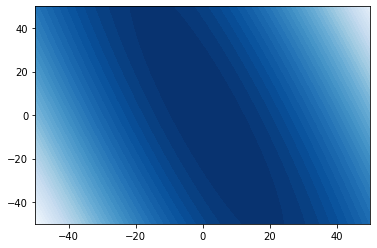

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
  return (1-x-y)**2 + (4-2*x-y)**2 + (5-4*x-y)**2

x = np.linspace(-50, 50, num=50)
y = np.linspace(-50, 50, num=50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

cs = plt.contourf(X, Y, -Z, 40, cmap='Blues')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

Then

$$
\begin{aligned}
\nabla f(\boldsymbol{x}) & =
\underbrace{
  \begin{pmatrix}
  & 2 (1-x_1-x_2)(-1) \\
  & 2 (1-x_1-x_2)(-1) \\
  \end{pmatrix}
}_{\nabla f_1(\boldsymbol x)}
+\underbrace{
    \begin{pmatrix}
  & 2 (4-2\, x_1-x_2)(-2) \\
  & 2 (4-2\, x_1-x_2)(-1) \\
  \end{pmatrix}
}_{\nabla f_2(\boldsymbol x)}
+\underbrace{
  \begin{pmatrix}
  & 2 (5-4\, x_1-x_2)(-4) \\
  & 2 (5-4\, x_1-x_2)(-1) \\
  \end{pmatrix}
  }_{\nabla f_3(\boldsymbol x)}=\\
& =
\underbrace{
  \begin{pmatrix}
  & -2+2\, x_1+2\,x_2 \\
  & -2+2\, x_1+2\,x_2 \\
  \end{pmatrix}
}_{\nabla f_1(\boldsymbol x)}
+\underbrace{
    \begin{pmatrix}
  & -16 \,+8\, x_1+4\,x_2 \\
  & -8 \,+4\, x_1+2\,x_2 \\
  \end{pmatrix}
}_{\nabla f_2(\boldsymbol x)}
+\underbrace{
  \begin{pmatrix}
  & -40\,+32\, x_1+8\,x_2 \\
  & -10+8\, x_1+2\,x_2 \\
  \end{pmatrix}
  }_{\nabla f_3(\boldsymbol x)}.
  \end{aligned}
$$
Let $\boldsymbol{x}^0=(1,1)^\top$ and $\alpha=0.01$.
Then

$$
\begin{aligned}
\boldsymbol{x}^1&=\boldsymbol{x}^0-\alpha \cdot \nabla f_1(\boldsymbol{x}^0)=(1,1)^\top-0.01\cdot (2,2)^\top=(0.98,0.98)^\top; \\
\boldsymbol{x}^2&=\boldsymbol{x}^1-\alpha \cdot \nabla f_2(\boldsymbol{x}^1)=\cdots=(1.02,1.00)^\top; \\
\boldsymbol{x}^3&=\boldsymbol{x}^2-\alpha \cdot \nabla f_3(\boldsymbol{x}^2)=\cdots=(1.02,1.00)^\top; \\
\boldsymbol{x}^4&=\boldsymbol{x}^3-\alpha \cdot \nabla f_1(\boldsymbol{x}^3)=\cdots=(0.99,0.98)^\top; \\
&\cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \\
\boldsymbol{x}^{1000}&=\cdots \cdots \cdots \cdots \cdots  = \cdots =(1.\color{red}{1}9,0.\color{red}{6})^\top.
\end{aligned}
$$

The true minimim is at $(1.2143,0.5)$.
SGD needs more iterations then GD.
With the same $\alpha$ and number of iterations GD would give $(1.214\color{red}{2}8, 0.50000\color{red}{3})$ that's much closer to the true answer.
But if you have millions of summands in real world big data SGD becomes computationally viable.

#Coordinate descent

Coordinate descent is based on the idea that the minimization of a multivariable function $f(\boldsymbol{x})$ can be achieved by minimizing it along one direction at a time, i.e., solving univariate (or at least much simpler) optimization problems in a loop. In the simplest case of cyclic coordinate descent, one cyclically iterates through the directions, one at a time, minimizing the objective function with respect to each coordinate direction at a time.

Suppose $\boldsymbol {x}=(x_1, x_2, \cdots, x_n)$.

The algo is following
$$x_i^{k+1}=\text{argmin}_{y\in \mathbb{R}} f(x_1^k, \cdots, y , \cdots, x_n^k).$$
At its step we minimize function of one variable (line search). This could be done with gradient descent, momentum or other methods.

In [ ]:
#@title ##Coordinate descent for function of 2 variables
%%html
<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/coordinate_descent.svg'>
</img>

##Example
As before
$$
\begin{aligned}
f(\boldsymbol{x})&=(1-\, x_1-x_2)^2+(4-2\, x_1-x_2)^2+(5-4\, x_1-x_2)^2=\\
&=42-58\, x+21\, x^2-20\, y+14\, xy+3 \, y^2.
\end{aligned}
$$
and $\boldsymbol{x}^0=(1,1)^\top$.
$$
\begin{aligned}
x_1^1 &=\text{argmin}_{y}f((y,1)^\top)=25-44\, y + 21 y^2=1.05;\\
x_1^2 &=\text{argmin}_{y}f((1.05,y)^\top)=\cdots=0.89; \\
x_2^1 &=\cdots=\cdots=1.08; \\
& \cdots \cdots \cdots \cdots \cdots \cdots \\
x_1^{1000}&=1.21429;\\
x_2^{1000}&=0.5.
\end{aligned}
$$

#Conjugate gradient method

`1. Calculate`
$$
\Delta x_n = -\nabla f(x_n)
$$
`2. Compute` $\beta_n$ `according to one of the formulas below`

* Fletcher-Reeves:
$$
\beta^{FR}_n=\frac{\Delta x_n^\top \Delta x_n}{\Delta x^{\top}_{n-1} \Delta x_{n-1}}
$$
* Polak–Ribière:
$$
\beta^{PR}_n=\frac{\Delta x_n^\top (\Delta x_n-\Delta x_{n-1})}{\Delta x^{\top}_{n-1} \Delta x_{n-1}}
$$
* Hestenes-Stiefel:
$$
\beta^{HS}_n=\frac{\Delta x_n^\top (\Delta x_n-\Delta x_{n-1})}{-s^{\top}_{n-1}(\Delta x_n-\Delta x_{n-1})}
$$
* Dai–Yuan:
$$
\beta^{DY}_n=\frac{\Delta x_n^\top \Delta x_n}{-s^{\top}_{n-1}(\Delta x_n-\Delta x_{n-1})}
$$

`3.Update the conjugate direction` $s_n=\Delta x_n+\beta_n s_{n-1}$.

`4.Perform a line search: optimize` $\alpha_n=\text{argmin}_\alpha f(x_n+\alpha \, s_n)$.

`5. Update the position` $x_{n+1}=x_n+\alpha_n s_n$.

In [ ]:
#@title #Exploring Newton CG


from IPython.display import display
import ipywidgets as widgets


class Memory:
  def __init__(self):
    self.x_ini = 0.0
    self.y_ini = 0.0
    self.iters = 2
    self.theta = 0.5

current_memory = Memory()

button = widgets.Button(description="Recalculate")
iters = widgets.IntSlider(min=2, max=50,
                          value=current_memory.iters,
                          description='Max Iterations:')

fnc = widgets.Text(value='(x/2)**2+(y)**2',
                   #placeholder='function',
                   description='Function:',
                   disabled=False)
theta_widget = widgets.FloatSlider(min=0.0, max=1.0,
                                   value=current_memory.theta,
                                   description='Theta')
def iter_assign(val):
  current_memory.iters = val.new
def theta_assign(val):
  current_memory.theta = val.new
iters.observe(iter_assign, names='value')
theta_widget.observe(theta_assign, names='value')

display(widgets.HBox([button, fnc]))

def on_button_clicked(b):
  function = fnc.value
  from IPython.display import clear_output
  clear_output()
  display(widgets.HBox([button, fnc]))
  print('Doing Science...')

  x_ini = current_memory.x_ini
  y_ini = current_memory.y_ini
  max_iter = current_memory.iters


  from plotly.subplots import make_subplots
  import plotly.graph_objects as go
  import numpy as np
  from scipy.optimize import minimize

  from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application, parse_expr
  transformations = (standard_transformations + (implicit_multiplication_application,))
  f = parse_expr(function, transformations=transformations)

  from sympy import diff
  from sympy import lambdify
  g_x = lambdify(['x', 'y'], diff(f, 'x'), "numpy")
  g_y = lambdify(['x', 'y'], diff(f, 'y'), "numpy")
  jacobian = lambda x,y: np.array([g_x(x, y), g_y(x, y)], dtype=float)
  func_to_minimize = lambdify(['x', 'y'], f, "numpy")
  g_xx = lambdify(['x', 'y'], diff(diff(f, 'x'), 'x'), "numpy")
  g_xy = lambdify(['x', 'y'], diff(diff(f, 'x'), 'y'), "numpy")
  g_yy = lambdify(['x', 'y'], diff(diff(f, 'y'), 'y'), "numpy")
  H = lambda x,y: [[g_xx(x, y), g_xy(x, y)], [g_xy(x, y), g_yy(x, y)]]

  history = [np.array([x_ini, y_ini])]
  def remember(x):
     history.append(x)

  from scipy import optimize
  f = lambda x: func_to_minimize(x[0], x[1]) #(x[0]/2)**2 + x[1]**2 #
  j = lambda x: jacobian(x[0], x[1]) #np.array([x[0]/2, 2*x[1]]) #
  h = lambda x: H(x[0], x[1])
  global res
  res = optimize.fmin_ncg(f, np.array([x_ini, y_ini]), fprime=j,
                          fhess=h, callback=remember)
  history.append(res)




  crashed = False

  _h = np.array(history)
  _x = _h.T[0]
  _y = _h.T[1]
  _z = np.array([f(x) for x in history], dtype=float)

  x_min = min(-10.0, np.min(_x))
  x_max = max(10.0, np.max(_x))
  y_min = min(-10.0, np.min(_y))
  y_max = max(10.0, np.max(_y))

  x_ = np.linspace(x_min, x_max, num=50)
  y_ = np.linspace(y_min, y_max, num=50)
  z_ = np.array([[f([x,y]) for x in x_] for y in y_], dtype=float)


  import matplotlib.pyplot as plt
  import base64
  import io
  fig = plt.figure(figsize=(20,20))
  ax = fig.gca()
  ax.axis('off')
  if np.max(z_) - np.min(z_) > 100:
    ax.contourf(x_, y_, np.sign(z_)*np.log(np.abs(z_) + 1.0), alpha=0.3)
  else:
    ax.contourf(x_, y_, z_, alpha=0.3)
  plt.close(fig)
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = u'data:image/  png;base64,' + base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()


  fig = dict(
      layout = dict(
          width=1200, height=600, autosize=False,
          showlegend = False,
          scene = {'domain': { 'x': [0.0, 0.44], 'y': [0, 1] } },
          xaxis1 = {'domain': [0.55, 1], 'range': [x_min, x_max], 'fixedrange': True},
          yaxis1 = {'domain': [0.0, 1.0], 'range': [y_min, y_max], 'fixedrange': True},
          title  = 'Minimization',
          margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
          updatemenus = [{'buttons': [{'args': [[k for k in range(len(_h))],
                                                {'frame': {'duration': 500.0, 'redraw': True},
                                                'fromcurrent': False, 'transition': {'duration': 0, 'easing': 'linear'}}],
                                      'label': 'Play',
                                      'method': 'animate'},
                                      {'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                                                        'mode': 'immediate',
                                                        'transition': {'duration': 0}}
                                                ],
                                      'label': 'Pause',
                                      'method': 'animate'
                                      }
                                      ],
                          'direction': 'left',
                          'pad': {'r': 10, 't': 85},
                          'showactive': True,
                          'type': 'buttons', 'x': 0.1, 'y': 0, 'xanchor': 'right', 'yanchor': 'top'}],
          sliders = [{'yanchor': 'top',
                      'xanchor': 'left',
                      'currentvalue': {'font': {'size': 16}, 'prefix': 'Step: ', 'visible': True, 'xanchor': 'right'},
                      'transition': {'duration': 0.0},
                      'pad': {'b': 10, 't': 50},
                      'len': 0.9,
                      'x': 0.1,
                      'y': 0,
                      'steps': [{'args': [[k], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': True},
                                                'transition': {'duration': 0, 'easing': 'linear'}}
                                          ],
                                'label': k,
                                'method': 'animate'} for k in range(len(_h))
                      ]}],
          images = [{'source' : image_base64,
                    'xref': 'x', 'yref': 'y',
                    'sizing': 'stretch',
                    'sizex': x_max - x_min, 'sizey': y_max - y_min,
                    'layer': 'below', 'opacity':1.0,
                    'x': x_min, 'y': y_max}]
      ),
      data = [
          {'type': 'scatter3d', 'name': 's3', 'x': _x, 'y': _y, 'z': _z,
           'line': {'color': 'red', 'width': 2},
           'marker': {'size': 4, 'colorscale': 'Viridis'}},
          {'type': 'surface', 'name': 'f2', 'x': x_, 'y': y_, 'z': z_, 'opacity': 0.8, 'showscale': False},
          #{'type': 'contour', 'name': 'c1', 'x':x_, 'y':y_, 'z':z_, 'contours': {'showlabels': True}},
          {'type': 'scatter', 'name': 's2', 'x': _x, 'y': _y,
          'line': {'color': 'red', 'width': 2}
          },
      ],
      frames=[
          {'name': str(k),
          'data': [
            {'type': 'scatter3d', 'name': 's3', 'x': _x[:k], 'y': _y[:k], 'z': _z[:k], 'line': {'color': 'red', 'width': 2}, 'marker': {'size': 4, 'colorscale': 'Viridis'}},
            {'type': 'surface', 'name': 'f2', 'x': x_, 'y': y_, 'z': z_, 'opacity': 0.8, 'showscale': False},
            #{'type': 'contour', 'name': 'c1', 'x':x_, 'y':y_, 'z':z_, 'contours': {'showlabels': True}},
            {'type': 'scatter', 'name': 's2', 'x': _x[:k], 'y': _y[:k],
            'line': {'color': 'red', 'width': 2}
            },
          ]} for k in range(len(_h)) ]
  )
  #plot(fig, auto_open=False)
  clear_output()
  if (crashed):
      print("Cannot find inverse matrix, Method compromised")
      print("Current gradient value: ")
      print(h)
      print("Current point: ", history[-1])

  display(widgets.HBox([button, fnc]))
  f = go.Figure(fig)
  f.show()

  def save_pos(pos):
    global current_memory
    current_memory.x_ini = (x_max - x_min) * pos[0] + x_min
    current_memory.y_ini = (y_max - y_min) * (1.0 - pos[1]) + y_min

  main_str = '''
  <canvas id="paint_here"
          onmousedown="mdown_handle(event)"
          onmousemove="mmove_handle(event)"
          onmouseup="mup_handle(event)"></canvas>
  <script>

  var el = document.getElementsByClassName("layer-subplot")[0];
  var rect = el.getBoundingClientRect();

  var canvas = document.getElementById("paint_here");
  canvas.style.cssText = "position:absolute; top:" + rect.top
                      + "px; left: " + rect.left
                      + "px; width:" + rect.width
                      + "px; height:" + rect.height
                      + "px; z-index:1000;";
  canvas.width = rect.width;
  canvas.height = rect.height;
  var ctx = canvas.getContext('2d');
  ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
  //ctx.fillStyle="#00FF00";
  //ctx.fillRect(0, 0, canvas.width, canvas.height); // field
  ''' + 'var x_ini = ' + str((current_memory.x_ini - x_min)/(x_max - x_min)) + ';' + 'var y_ini = ' + str(1.0 - (current_memory.y_ini - y_min)/(y_max - y_min)) + ';' + '''
  var active_pt = [canvas.width * x_ini, canvas.height * y_ini];

  function draw() {
      ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
      //ctx.fillText("drawing", 20, 20);

      ctx.beginPath();
      ctx.arc(active_pt[0], active_pt[1], 10, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = "rgba(210, 0, 0, 0.75)";
      ctx.fill();
  }

  var do_move = false;

  function is_close(pt1, pt2) {
    return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
          +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
          <= 10*10;
  }

  function mdown_handle(evt) {
    x = evt.offsetX;
    y = evt.offsetY;
    do_move = is_close(active_pt, [x, y]);
  }

  function mmove_handle(evt) {
    if (!do_move)
        return;
    active_pt[0] = evt.offsetX;
    active_pt[1] = evt.offsetY;
  }

  function mup_handle(evt) {
    do_move = false;
    remember();
  }

  var w = canvas.width;
  var h = canvas.height;

  async function remember() {
    var x = active_pt[0] / w;
    var y = active_pt[1] / h;
    const result = await google.colab.kernel.invokeFunction('notebook.rememberPos', [[x, y]], {});
  }

  var timer = setInterval(draw, 10);

  </script>
  '''

  import IPython
  from google.colab import output
  display(IPython.display.HTML(main_str))
  output.register_callback('notebook.rememberPos', save_pos)
  print(res)


button.on_click(on_button_clicked)

[0.00000000e+00 8.67361738e-19]


#Optimized gradient descent (ft. Hessian)

In the methods above we adjusted $\alpha$ using first order information from the function (gradient). We could do better if we use second-order information (hessian).
Suppose we substitute function $f$ with quadratic approximation

$$
f(\boldsymbol {x}+ \alpha \boldsymbol {h}) \approx f(\boldsymbol {x})+\alpha \nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{\alpha^2}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h},
$$

where $h$ is a arbitrary direction and $\alpha$ is a variable. Let me denote it by

$$
\bar{f}(\alpha)=f(\boldsymbol {x})+\alpha \nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{\alpha^2}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}.
$$

In [ ]:
#@title #Geometric interpretation
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_optimized_grad_desc_approx.html"
        width="800" height="400"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

Differentiate it by $\alpha$ and set the derivative to $0$ to get extremum

$$
\frac{d\bar{f}}{d\alpha}=0 \quad \Longrightarrow \quad \alpha_*=-\frac{\nabla f(\boldsymbol {x}) \boldsymbol {h}}{\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}}.
$$

Now in the method of gradient descent we can choose

$$
\boldsymbol {h}=\nabla f(\boldsymbol {x}), \\
\alpha =-\frac{\boldsymbol {h}^{\top} \boldsymbol {h}}{\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}}.
$$

All in all we have

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\frac{\boldsymbol {h}^{\top} \boldsymbol {h}}{\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}} \cdot \boldsymbol {h}.
$$

where $\boldsymbol {h}=\nabla f(\boldsymbol{x}_{n})$.

In [ ]:
#@title #Exploring gradient+hessian descent
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_optimized_grad_desc.html"
        width="800" height="400"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

#Newton's method (Newton-Raphson method / метод дотичних)

This is another second order method that makes use of hessian

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\boldsymbol{H}^{-1}(\boldsymbol{x}_n) \cdot \nabla f(\boldsymbol{x}_{n}).
$$

This is a generalization of a $1D$ Newton method to find zeros of the function $f$

$$
x_{n+1}=x_n-\frac{f(x_n)}{f^{'}(x_n)}.
$$

In [ ]:
#@title ##Newton-Raphson method

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
  `
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/newton_raphson_step_1.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/newton_raphson_step_2.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/newton_raphson_step_3.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/newton_raphson_step_4.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/newton_raphson_step_5.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/newton_raphson_step_6.svg'>
  </img>
`
  ]
)
</script>

To find minimum we need to apply this formula to the $f^{'}(x)$.

$$
x_{n+1}=x_n-\frac{f^{'}(x_n)}{f^{''}(x_n)}.
$$

Newton's method may have complex behavior: watch basins of attraction for the equation

$$
z^3=1
$$

solved with Newton's method.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_06_optimization/julia_fractal.png)

Geometrically we substitute a surface with a paraboloid that has the save curvature and gradient as the initial surface. We then calculate the minimum of this paraboloid and proceed to the next iteration.

$$
\bar{f}(\boldsymbol {h})=f(\boldsymbol {x})+ \nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{1}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}.
$$

We differentiate to get [Matrix cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)

$$
\frac{d\bar{f}(\boldsymbol {h})}{d\boldsymbol {h}}=\nabla f(\boldsymbol {x})+\boldsymbol {H} \boldsymbol {h},
$$

$$
\frac{d\bar{f}(\boldsymbol {h})}{d\boldsymbol {h}}=0 \quad \Rightarrow \quad \boldsymbol {h}_* =- \boldsymbol {H}^{-1}\, \nabla f(\boldsymbol {x}).
$$

If we do it on every iteration we get

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\boldsymbol{H}^{-1}(\boldsymbol{x}_n) \cdot \nabla f(\boldsymbol{x}_{n}).
$$

In order to calculate hessian determinant should be non-zero. If function is not convex the Hessian is not positive-definite and Newton method has troubles converging to a minimum. In fact Newton method finds extremum
of quadratic function irregardless whether it's maximum. minimum or inflection point ([here](http://bl.ocks.org/dannyko/raw/0956c361a6ce22362867/) is nice visualization of this).

Inverse hessian may be hard to calculate and it may be easier to solve system of linear equations instead (**implicit Newton method**)

$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\boldsymbol{y}, \\
\boldsymbol{H}\boldsymbol{y} &= \nabla f (\boldsymbol{x}_{n}).
\end{aligned}
$$

When it's hard to calculate hessian we can use approximation of hessian. That's called **quasi-Newton method**.

We can also adjust a step size at every iteration
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha_n \boldsymbol{y}, \\
\boldsymbol{H}\boldsymbol{y} &= \nabla f (\boldsymbol{x}_{n}).
\end{aligned}
$$

It's called **damped implicit Newton method**.



In [ ]:
#@title #Geometric interpretation
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_newton_method_approx.html"
        width="800" height="400"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

In [ ]:
#@title #Exploring Newton's method
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_newton_method.html"
        width="800" height="400"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

#Gauss-Newton (GN) and Levenberg–Marquardt (LM) algorithms

A second-order Newton method gave us following iteration

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\boldsymbol{H}^{-1}(\boldsymbol{x}_n) \cdot \nabla f(\boldsymbol{x}_{n}).
$$

The idea of Gauss-Newton method is to approximate Hessian using 1-st order derivatives for a certain class of functions.
Consider following function

$$
f(\boldsymbol{x})=\sum_{i=1}^n f_i^2(\boldsymbol{x})=\|\boldsymbol{f}(\boldsymbol{x})\|^2_2,
$$

where $\boldsymbol{f}(\boldsymbol{x})=(f_1(\boldsymbol{x}), \cdots, f_n(\boldsymbol{x}))^\top$.

For the functions of this type the gradient and the Hessian read as

$$
\begin{aligned}
\nabla_j f(\boldsymbol{x}_{n})&=2\sum_{i=1}^n f_i(\boldsymbol x) \frac{\partial f_i(\boldsymbol x)}{\partial x_j}, \\
H_{jk}&=2\sum_{i=1}^n \left(\frac{\partial f_i}{\partial x_j} \frac{\partial f_i}{\partial x_k}+f_i\frac{\partial^2 f_i}{\partial{x_j} \partial{x_k}}\right).
\end{aligned}
$$

Now let me introduce the Jacobian that we will use

$$
J_{ij}=\frac{\partial f_i}{\partial x_j},
$$

that's in fact a bunch of transposed gradient vectors stacked together.

In [1]:
#@title ##The Jacobian matrix
%%html
<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/jacobian_matrix.svg'>
</img>

If $\left|f_i\frac{\partial^2 f_i}{\partial{x_j} \partial{x_k}}\right| \ll \left|\frac{\partial f_i}{\partial x_j} \frac{\partial f_i}{\partial x_k}\right|$ we can express the Hessian in terms of the Jacobian

$$
\begin{aligned}
\boldsymbol{H} & \approx 2 \sum_{i=1}^n J_{ij} J_{ik} = 2 \sum_{i=1}^n J^\top_{ji} J_{ik} = 2\, \boldsymbol{J}^\top \boldsymbol{J}.
\end{aligned}
$$

Note that we can express gradient in terms of the Jacobian as well

$$
\nabla f = 2\, \boldsymbol{J}^\top \boldsymbol{f}.
$$

Now substitute $\boldsymbol{H}$ and $\nabla$ into the first expression of this section to get

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-(\boldsymbol{J}^\top \boldsymbol{J})^{-1} \boldsymbol{J}^\top \boldsymbol{f}(\boldsymbol{x}_{n}).
$$

If taking inverse matrix is hard it may be viable solve a system of linear equations (called *normal equations*) instead

$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha \cdot \boldsymbol{y}, \\
\boldsymbol{J}^\top \boldsymbol{J} \, \boldsymbol{y} &= \boldsymbol{J}^\top \boldsymbol{f}(\boldsymbol{x}_{n}).
\end{aligned}
$$

**Levenberg–Marquardt algorithm** is a further extension of Newton-Gauss method:

$$
\begin{aligned}
& \boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \boldsymbol{y}, \\
& (\boldsymbol{J}^\top \boldsymbol{J} + \color{red}{\lambda \cdot \boldsymbol{I}})\, \boldsymbol{y} = \boldsymbol{J}^\top \boldsymbol{f}(\boldsymbol{x}_{n})
\end{aligned}
$$

where $\boldsymbol{I}$ is identity matrix and $\lambda$ is an additional variable that should be determined.
Note that

$$
\begin{aligned}
small \, \lambda \, \, \, \, \, &\rightarrow \, \, \, \, \,  \, Levenberg–Marquardt \, \approx \,  Newton-Gauss,\\
large \, \lambda \, \, \, \, \, \,  &\rightarrow \, \, \, \, \,  \, Levenberg–Marquardt \, \approx \,  Gradient \, \, descend.
\end{aligned}
$$

* The LMA interpolates between the Gauss–Newton algorithm (GNA) and the method of gradient descent.
* The LMA is more robust than the GNA, which means that in many cases it finds a solution even if it starts very far off the final minimum.
* For well-behaved functions and reasonable starting parameters, the LMA tends to be a bit slower than the GNA.


#Trust region methods

Sometimes Newton predicts the point that is too far from the initial guess. This suggests to bound the region of applicability of our quadratic model to a small region and to minimize it only inside this region (this is called **region subproblem**).

A region is usually a Euclidean-metric-ball of radius $\Delta_n$.
Usually the model is quadratic function.

Consider this simple example with only one variable:

In [5]:
#@title ##Trust regions

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
  `
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/trust_regions_1.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/trust_regions_2.svg'>
  </img>
`
  ]
)
</script>

We intoduce "goodness of fit" $\rho_n$ that shows how well our model predicts behavior of the function.

Here is the basic trust-region algorithm. We initialize trust region radius $\Delta_0>0$ and set the constants.

`On each iteration we construct` $\rho_n$.

`If` $\rho_n \geq \nu_v$ `("very successful step")` `we make a step and increase our trust region:`

$$
\begin{aligned}
\boldsymbol{x}_n &\rightsquigarrow \boldsymbol{x}_{n+1},\\
\Delta_{n+1}&=\gamma_i \Delta_n.
\end{aligned}
$$

`Else if` $\rho_n \geq \nu_s$ `("successful step")` `we make a step but our trust region stays the same:`

$$
\begin{aligned}
\boldsymbol{x}_n &\rightsquigarrow \boldsymbol{x}_{n+1}, \\
\Delta_{n+1}&= \Delta_n.
\end{aligned}
$$

`Else if` $\rho_n < \nu_s$ `("unsuccessful step")` `we DON'T make a step and decrease the trust region:`

$$
\begin{aligned}
\boldsymbol{x}_n, & \\
\delta_n&=\gamma_d \delta_n.
\end{aligned}
$$

Typical constants:

$$
\begin{aligned}
\nu_v&=0.9; \\
\nu_s&=0.1; \\
\gamma_i&=2; \\
\gamma_d&=0.5. \\
\end{aligned}
$$

Here what a typical workflow of trust region algorithm looks like (minimization of function of $2$ variables):




In [6]:
#@title ##Trust regions
%%html
<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/trust_regions_iterations.svg'>
</img>

There are many variations of trust region methods in `scipy.optimize.minimize`:
* `trust-constr`;
* `dogleg`;
*` trust-ncg`;
* `trust-exact`;
* `trust-krylov`.

In [ ]:
#@title #Exploring minimization methods (rerun)

import numpy as np
from scipy.optimize import minimize
from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application, parse_expr
from sympy import diff
from sympy import lambdify
import json


def get_function(func, jacobian, hessian):
  transformations = (standard_transformations + (implicit_multiplication_application,))
  f = parse_expr(func, transformations=transformations)
  if jacobian == 'custom':
    g_x = lambdify(['x', 'y'], diff(f, 'x'), "numpy")
    g_y = lambdify(['x', 'y'], diff(f, 'y'), "numpy")
    jacobian = lambda x: np.array([g_x(x[0], x[1]), g_y(x[0], x[1])], dtype=float)
  if jacobian == 'none':
    jacobian = None
  if hessian == 'custom':
    g_xx = lambdify(['x', 'y'], diff(diff(f, 'x'), 'x'), "numpy")
    g_xy = lambdify(['x', 'y'], diff(diff(f, 'x'), 'y'), "numpy")
    g_yy = lambdify(['x', 'y'], diff(diff(f, 'y'), 'y'), "numpy")
    H = lambda x,y: [[g_xx(x, y), g_xy(x, y)], [g_xy(x, y), g_yy(x, y)]]
    hessian = lambda x: np.array(H(x[0], x[1]), dtype=float)
  if hessian == 'none':
    hessian = None
  ftm = lambdify(['x', 'y'], f, "numpy")
  func_to_minimize = lambda x: ftm(x[0], x[1])
  return func_to_minimize, jacobian, hessian

def process_min(func, x_ini, y_ini, iters, method, jac, hes):
  func_to_minimize, jacobian, hessian = get_function(func, jac, hes)
  history = {'iterations': [np.array([x_ini, y_ini])],
             'trust_r': []}
  def store_data(xk, *args):
    if len(args) > 0 and 'tr_radius' in args[0]:
      history['trust_r'].append(args[0]['tr_radius'])
    history['iterations'].append(xk)

  minimize(func_to_minimize, [x_ini, y_ini],
          method=method, jac=jacobian, hess=hessian,
          options={'maxiter':int(iters)}, callback=store_data)

  result = {'iters_x': [h[0] for h in history['iterations']],
            'iters_y': [h[1] for h in history['iterations']],
            'iters_z': [func_to_minimize(x) for x in history['iterations']]}

  result['x_min'] = min(-10.0, np.min(result['iters_x']))
  result['x_max'] = max(10.0, np.max(result['iters_x']))
  result['y_min'] = min(-10.0, np.min(result['iters_y']))
  result['y_max'] = max(10.0, np.max(result['iters_y']))

  result['plot_x'] = np.linspace(result['x_min'], result['x_max'], num=50).tolist()
  result['plot_y'] = np.linspace(result['y_min'], result['y_max'], num=50).tolist()
  result['plot_z'] = [[func_to_minimize([x,y]) for x in result['plot_x']] for y in result['plot_y']]
  result['z_min'] = np.min(result['plot_z'])
  result['z_max'] = np.max(result['plot_z'])

  result['trust_r'] = history['trust_r']

  if result['z_max'] - result['z_min'] > 1000:
    result['plot_z_scaled'] = (np.sign(result['plot_z']) * np.log(np.abs(result['plot_z']) + 1.0)).tolist()
  else:
    result['plot_z_scaled'] = result['plot_z']

  return IPython.display.JSON(result)


import requests
url = 'https://fbeilstein.github.io/machine_learning/lecture_06_optimization/sclearn_demo.html'
response = requests.get(url)
html_content = response.text

import IPython
from google.colab import output
display(IPython.display.HTML(html_content))
output.register_callback('notebook.processMin', process_min)

Recalculate,"f(x,y) =",(1-x)**2+100*(y-x**2)**2 x**2 + y**2 x**2 + y**2 + 1.7*x*y sin(x/3)*cos(y/4),Max.Iters:,3,,Method:,Nelder-Mead Powell CG BFGS Newton-CG L-BFGS-B TNC COBYLA SLSQP trust-constr dogleg trust-ncg trust-exact trust-krylov,Jacobian:,none 2-point 3-point cs symbolic,Hessian:,none 2-point 3-point cs symbolic


#Other methods

If you use `scipy.optimize.minimize` function you have following options
* `Nelder–Mead method` (0 order)
* `Powell's method` (0 order)
* `BFGS method` (quasi-Newton)
* `Newton CG method` (modified Newton)
* `L-BFGS-B method` (quasi-Newton)
* `TNC method`
* `COBYLA method`
* `SLSQP method`
* `Trust region methods`

#Conclusions

* Optimization methods are heavily used in ML
* There many methods that differ by approach and order
* First-order methods are strongly needed for NN
* Convex optimization is heavily used in classic ML and problems that are solved this way will emerge in this course later.